# Initial Data Analysis

### `Project - Bank Loan`

### `Data Description`
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
 

### `Context`
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


### `Attribute Information`

•	ID: Customer ID
•	Age: Customer's age in completed years
•	Experience: #years of professional experience
•	Income: Annual income of the customer ($000)
•	ZIP Code: Home Address ZIP
•	Family: Family size of the customer
•	CCAvg: Avg. spending on credit cards per month ($000)
•	Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
•	Mortgage: Value of house mortgage if any. ($000)
•	Personal Loan: Did this customer accept the personal loan offered in the last campaign?
•	Securities Account: Does the customer have a securities account with the bank?
•	CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
•	Online: Does the customer use internet banking facilities?
•	Credit card: Does the customer use a credit card issued by the bank?
 

### `Learning Outcomes`


•	Exploratory Data Analysis
•	Preparing the data to train a model
•	Training and making predictions using a classification model
•	Model evaluation
 


### `Objective`

The classification goal is to predict the likelihood of a liability customer buying personal loans.
 
 
### `Steps and tasks`

1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
•	Number of unique in each column?
•	Number of people with zero mortgage?
•	Number of people with zero credit card spending per month?
•	Value counts of all categorical columns.
•	Univariate and Bivariate
•	Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6.	Give conclusion related to the Business understanding of your model? (5 marks)



In [4]:
#Importing all the packages we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
#Reading the dataset with the original name
df_Loan=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [6]:
#This gives the first 5 rows in the dataset
df_Loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


From the above output we can see the datatypes of all the variables, total number of non null observations(no null values).

In [8]:
#This gives us the total number of rows and columns in the dataframe.
df_Loan.shape

(5000, 14)

In [9]:
df_Loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From the above ouput we can look at the statistical summary of the variables in the dataset. I am going to dig deeper into each of these variables and see how the data is distributed below. Meanwhile, one imputation we need to modify is the variable Experience. More below.

In [10]:
df_Loan['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

As you can see there are some values which are negative for Experience, which logically do not make sense, I am going to replace these with 0.

In [11]:
df_Loan[df_Loan < 0] = 0

In [12]:
#This output shows we successfully replaced negative values with 0
df_Loan['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43], dtype=int64)

# Exploratory Data Analysis

In [13]:
#Number of unique in each column?
df_Loan.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [14]:
#Number of people with zero mortgage?
len(df_Loan[(df_Loan['Mortgage']==0)])

3462

In [15]:
#Number of people with zero credit card spending per month?
len(df_Loan[(df_Loan['CCAvg']==0)])

106

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


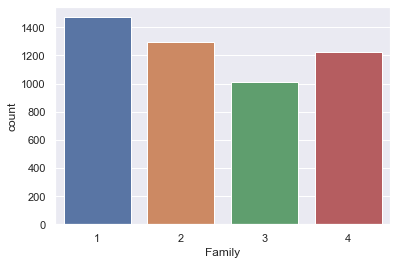

1    2096
3    1501
2    1403
Name: Education, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


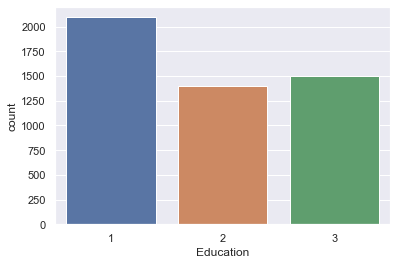

0    4520
1     480
Name: Personal Loan, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


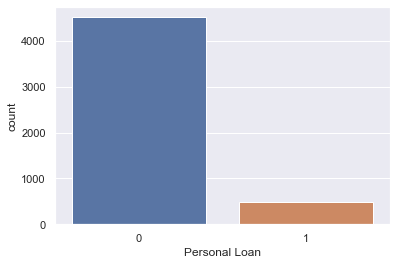

0    4478
1     522
Name: Securities Account, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


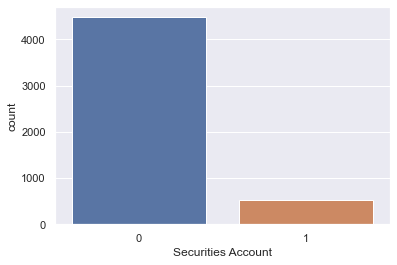

0    4698
1     302
Name: CD Account, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


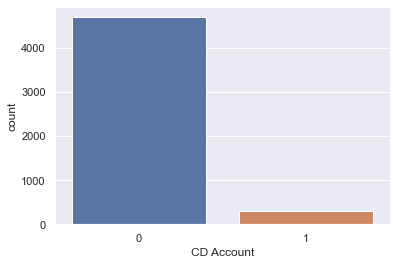

1    2984
0    2016
Name: Online, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


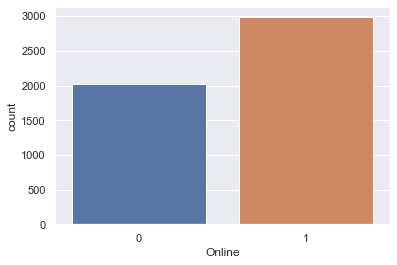

0    3530
1    1470
Name: CreditCard, dtype: int64

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


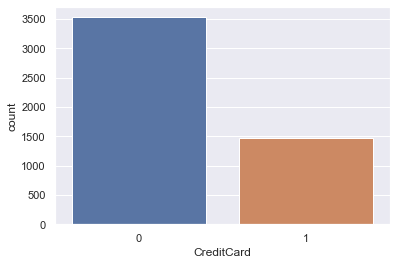

In [16]:
#Value counts of all categorical columns.
#df_Loan[['Family','Education','Personal Loan','Securities Account','CD Account','Online','Credit card']].value_counts()


display(df_Loan['Family'].value_counts())
sns.countplot(df_Loan['Family'])
plt.show()

display(df_Loan['Education'].value_counts())
sns.countplot(df_Loan['Education'])
plt.show()

display(df_Loan['Personal Loan'].value_counts())
sns.countplot(df_Loan['Personal Loan'])
plt.show()

display(df_Loan['Securities Account'].value_counts())
sns.countplot(df_Loan['Securities Account'])
plt.show()

display(df_Loan['CD Account'].value_counts())
sns.countplot(df_Loan['CD Account'])
plt.show()

display(df_Loan['Online'].value_counts())
sns.countplot(df_Loan['Online'])
plt.show()

display(df_Loan['CreditCard'].value_counts())
sns.countplot(df_Loan['CreditCard'])
plt.show()

    Variable Family has four categories, pretty much equally distributed with '1' with the highest number of records.               

    Variable Education has three categories, pretty much equally distributed with '1' with the highest number of records.

    Securities Account and CD Account also are binary variables, with the value '1' with a very few values.

    Variable Online is a binary variable, with values almost equally distributed.

    Target Variable Personal Loan is a binary variable, with value '1' (people took personal loan) with just 10% of the records.

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

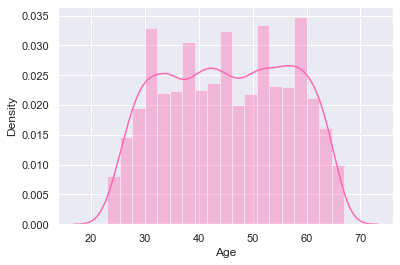

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

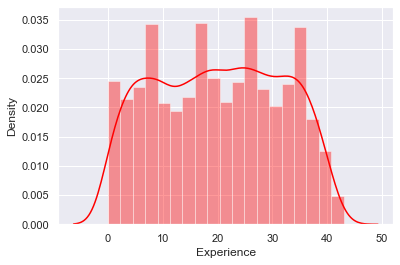

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

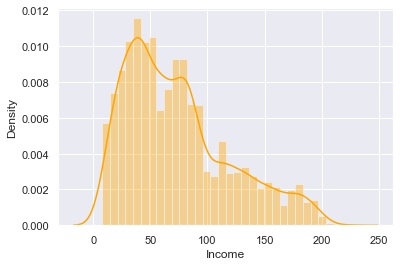

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

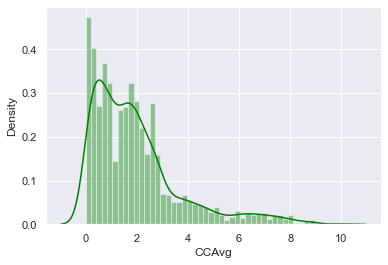

C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

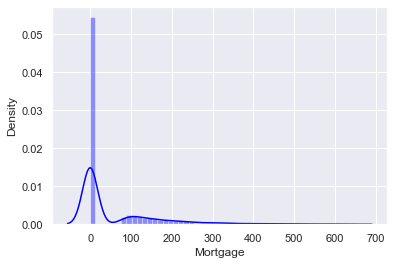

In [17]:
display(sns.distplot(df_Loan['Age'],color='hotpink'))
plt.show()

display(sns.distplot(df_Loan['Experience'],color='red'))
plt.show()

display(sns.distplot(df_Loan['Income'],color='orange'))
plt.show()

display(sns.distplot(df_Loan['CCAvg'],color='green'))
plt.show()

display(sns.distplot(df_Loan['Mortgage'],color='blue'))
plt.show()

    Looking at the distribution of continuous variables, Age and Experience do not seem to be skewed much in either directions.

    Income and CCAvg are definitely right skewed data. We will see what impact it has on the target variable in our model.

    Variable Mortgage is also right skewed. Most of the customer do not have any mortgages in their history.

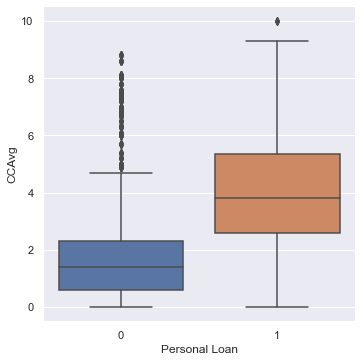

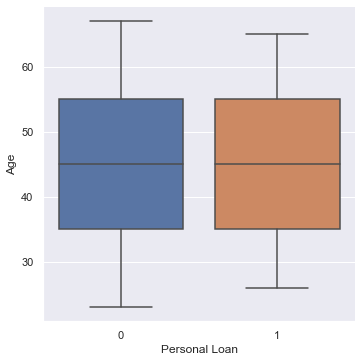

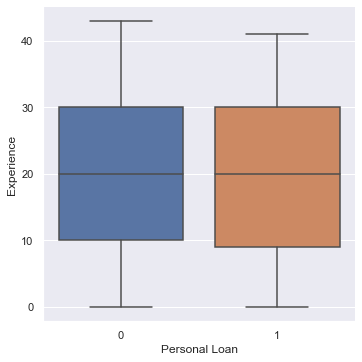

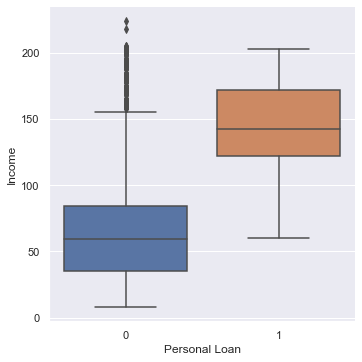

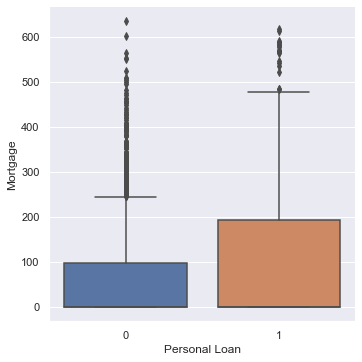

In [23]:
sns.catplot(x="Personal Loan", y="CCAvg", kind="box", data=df_Loan)
sns.catplot(x="Personal Loan", y="Age", kind="box", data=df_Loan)
sns.catplot(x="Personal Loan", y="Experience", kind="box", data=df_Loan)
sns.catplot(x="Personal Loan", y="Income", kind="box", data=df_Loan)
sns.catplot(x="Personal Loan", y="Mortgage", kind="box", data=df_Loan)

Looking at the above distribution of target variable in comparison to some of the independent variables, CCAvg & Income & Mortgage seem to have a lot of outliers. We will see how it impacts our model.

# Data Preparation for Model Building

In [29]:
df_Loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [32]:
#Binning the variable Income and will treat them as categorical variable
bins = [8, 40, 65, 100, 224]

cats = ['8-39', '40-64', '65-99', '100-224']
df_Loan["Income_cat"] = pd.cut(df_Loan.Income, bins, labels=cats)
df_Loan['Income_cat']

0       40-64
1        8-39
2        8-39
3       65-99
4       40-64
        ...  
4995     8-39
4996     8-39
4997     8-39
4998    40-64
4999    65-99
Name: Income_cat, Length: 5000, dtype: category
Categories (4, object): ['8-39' < '40-64' < '65-99' < '100-224']

In [33]:
#Binning the variable CCAvg and will treat them as categorical variable
bins = [0, 0.7, 1.5, 2.5, 10]

cats = ['0-0.6', '0.7-1.4', '1.5-2.4','2.5-10']
df_Loan["CCAvg_cat"] = pd.cut(df_Loan.CCAvg, bins, labels=cats)
df_Loan['CCAvg_cat']

0       1.5-2.4
1       0.7-1.4
2       0.7-1.4
3        2.5-10
4       0.7-1.4
         ...   
4995    1.5-2.4
4996      0-0.6
4997      0-0.6
4998      0-0.6
4999    0.7-1.4
Name: CCAvg_cat, Length: 5000, dtype: category
Categories (4, object): ['0-0.6' < '0.7-1.4' < '1.5-2.4' < '2.5-10']

In [35]:
pd.crosstab(df_Loan['Income_cat'],df_Loan['Personal Loan'],margins=True)

Personal Loan,0,1,All
Income_cat,,,
8-39,1367,0,1367
40-64,1217,3,1220
65-99,1139,39,1178
100-224,774,438,1212
All,4497,480,4977


In [36]:
pd.crosstab(df_Loan['CCAvg_cat'],df_Loan['Personal Loan'],margins=True)

Personal Loan,0,1,All
CCAvg_cat,,,
0-0.6,1237,38,1275
0.7-1.4,1095,39,1134
1.5-2.4,1197,40,1237
2.5-10,886,362,1248
All,4415,479,4894


# Input Data for the Model

In [74]:
#Dropping continuous 'Income' and 'CCAvg' and keeping the categorical ones we created. 
#Including Zip Code for initial model to see what impact it will have on the performance.
X=df_Loan.drop(columns=['Personal Loan','Income','CCAvg','ID']) 
Y=df_Loan['Personal Loan']

In [75]:
#Creating dummy variables for the newly created categorical variables. We have 3 new variables each.
X=pd.get_dummies(data=X,drop_first=True)

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7,stratify=Y)
#'stratify' argument maintains the distribution of classes in train and test sets same as original dataset.

In [77]:
y_train.value_counts()

0    3164
1     336
Name: Personal Loan, dtype: int64

In [78]:
y_test.value_counts()

0    1356
1     144
Name: Personal Loan, dtype: int64

# Build Logistic Regression Model(With ZipCode)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model=LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix

In [86]:
RC_Score=recall_score(y_test,y_pred)
print('Recall Score: %.6f' % RC_Score)

Recall Score: 0.000000


In [87]:
RA_Score=roc_auc_score(y_test,y_pred)
print('ROC AUC Score: %.6f' % RA_Score)

ROC AUC Score: 0.500000


As we see above when I include Zip Code variable the recall score is 0.0, which means that we did not even predict a single observation correctly. Now lets check what happens if we exclude Zip Code in the mode.

In [89]:
#Dropping continuous 'Income','Zip Code' and 'CCAvg' and keeping the categorical ones we created. 
#Including Zip Code for initial model to see what impact it will have on the performance.
X=df_Loan.drop(columns=['Personal Loan','Income','CCAvg','ID','ZIP Code']) 
Y=df_Loan['Personal Loan']

In [91]:
#Creating dummy variables for the newly created categorical variables. We have 3 new variables each.
X=pd.get_dummies(data=X,drop_first=True)

In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7,stratify=Y)
#'stratify' argument maintains the distribution of classes in train and test sets same as original dataset.

In [93]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix

In [94]:
RC_Score=recall_score(y_test,y_pred)
print('Recall Score: %.6f' % RC_Score)

Recall Score: 0.659722


In [95]:
RA_Score=roc_auc_score(y_test,y_pred)
print('ROC AUC Score: %.6f' % RA_Score)

ROC AUC Score: 0.822486


As we see the Recall Score is 65%, which is pretty good for our model. So I am going to go ahead with this model further.

In [96]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(x_test)[:,0]
z['Probaility that output is 1'] = model.predict_proba(x_test)[:,1]

# Predicting target variable using sklearn Logistic regression
z['Predicted'] = model.predict(x_test)

In [99]:
z.head(50)

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.996666,0.003334,0
1,0,0.923222,0.076778,0
2,0,0.977574,0.022426,0
3,0,0.880346,0.119654,0
4,0,0.998803,0.001197,0
5,0,0.999042,0.000958,0
6,0,0.999993,0.000007,0
7,0,0.990285,0.009715,0
8,1,0.753728,0.246272,0
9,0,0.998438,0.001562,0


In [100]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No Default","Default"] , yticklabels = ["No Default","Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

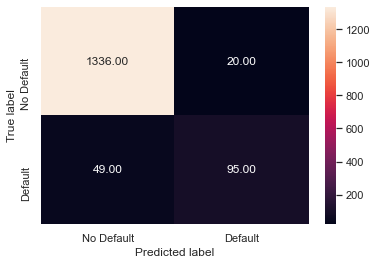

In [101]:
draw_cm( z['Actual'], z['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.66      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsudh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


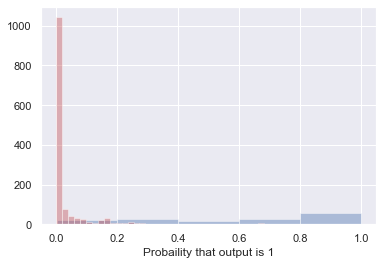

In [103]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )
plt.show()

Looking at the recall score of our model here, 65%(95 correctly predicted out of 149), being a pretty decent amount. But as we see from the above data, the percentage of customers who accepted Personal Loan offer is extremely low as compared to who did not.

My thesis here is that even though the model performance seems to be good, I think the initial data we have needs to be improved upon. For example, 

1. I need more independent variables to decide if any of those factors make a difference to the target variable.
2. Let us figure out why so few of our customer accepted the personal loan offer.
3. Can we tweak the offer so as to increase the acceptance rate.

As for our model,

1. The recall score, precision and accuracy score being really good I believe the company's goal of targeting the right customers for this mailing campaign can be achieved with this model.


# Finding Coeffecients

In [106]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

lg.summary()

         Current function value: 0.104599
         Iterations: 35


C:\Users\vsudh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:                  0.6692
Time:                        23:22:00   Log-Likelihood:                -366.10
converged:                      False   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                5.473e-307
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -26.9240   1047.100     -0.026      0.979   -2079.202    2025.354
Age                   -0.0094      0.087     -0.107      0.914      -0.181       0.162
Experience             0.0122      0.088      0.139      0.889      -0.159       0.184
Family                 0.7021      0.098      7.167      0.000       0.510       0.894
Education              1.9176      0.147     13.046      0.000       1.630       2.206
Mortgage               0.0011      0.001      1.561      0.119      -0.000       0.002
Securities Account    -1.7004      0.415     -4.100      0.000      -2.513      -0.887
CD Account             4.3124      0.448      9.629      0.000       3.435       5.190
Online                -0.6861      0.208     -3.306      0.001      -1.093      -0.279
CreditCard            -1.4224      0.276     -5.145      0.000      -1.964      -0.881
Income_cat_40-64      14.9453   1047.098      0.014      0.989   -2037.329    2067.219
Income_cat_65-99      17.0436   1047.098      0.016      0.987   -2035.230    2069.317
Income_cat_100-224    21.6654   1047.098      0.021      0.983   -2030.608    2073.939
CCAvg_cat_0.7-1.4      0.1752      0.403      0.434      0.664      -0.615       0.965
CCAvg_cat_1.5-2.4     -1.5634      0.408     -3.832      0.000      -2.363      -0.764
CCAvg_cat_2.5-10       1.0740      0.315      3.406      0.001       0.456       1.692
======================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""